# 1. Binary Logistic Regression

# Imports

In [ ]:
import torch
import torch.nn as nn
import sys
import os

sys.path.append(os.path.abspath(".."))

from dataset import preprocess_mnist
from models.logistic_regression import LogisticRegressionModel
from train import train_model, test_model
from utils import plot_curves, print_confusion_matrix

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Binary 0 vs 1 subset

In [5]:
train_loader, val_loader, test_loader = preprocess_mnist(flatten=True)

100%|██████████| 9.91M/9.91M [00:29<00:00, 341kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 143kB/s]
100%|██████████| 1.65M/1.65M [00:03<00:00, 471kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.87MB/s]


# Filter 0 and 1 only

In [6]:
def filter_binary(loader):
    X, y = [], []
    for img, label in loader.dataset:
        if label in [0, 1]:
            X.append(img)
            y.append(label)
    X = torch.stack(X)
    y = torch.tensor(y)
    ds = torch.utils.data.TensorDataset(X, y)
    return torch.utils.data.DataLoader(ds, batch_size=64, shuffle=True)

train_loader_bin = filter_binary(train_loader)
val_loader_bin = filter_binary(val_loader)
test_loader_bin = filter_binary(test_loader)

# Model

In [7]:
model_log = LogisticRegressionModel(input_dim=784)
loss_fn = nn.BCELoss()

# Train

In [8]:
train_losses, val_losses, train_accs, val_accs = train_model(
    model_log, train_loader_bin, val_loader_bin,
    epochs=30, lr=0.01, device=device, loss_fn=loss_fn, binary=True
)

Epoch [1/30] Train Loss: 0.2335, Val Loss: 0.1076, Train Acc: 0.9861, Val Acc: 0.9945


Epoch [2/30] Train Loss: 0.0793, Val Loss: 0.0648, Train Acc: 0.9967, Val Acc: 0.9949


Epoch [3/30] Train Loss: 0.0527, Val Loss: 0.0488, Train Acc: 0.9968, Val Acc: 0.9949


Epoch [4/30] Train Loss: 0.0409, Val Loss: 0.0404, Train Acc: 0.9970, Val Acc: 0.9953


Epoch [5/30] Train Loss: 0.0340, Val Loss: 0.0350, Train Acc: 0.9971, Val Acc: 0.9953


Epoch [6/30] Train Loss: 0.0295, Val Loss: 0.0314, Train Acc: 0.9972, Val Acc: 0.9953


Epoch [7/30] Train Loss: 0.0263, Val Loss: 0.0286, Train Acc: 0.9976, Val Acc: 0.9953


Epoch [8/30] Train Loss: 0.0239, Val Loss: 0.0266, Train Acc: 0.9979, Val Acc: 0.9953


Epoch [9/30] Train Loss: 0.0220, Val Loss: 0.0249, Train Acc: 0.9978, Val Acc: 0.9953


Epoch [10/30] Train Loss: 0.0205, Val Loss: 0.0235, Train Acc: 0.9978, Val Acc: 0.9953


Epoch [11/30] Train Loss: 0.0192, Val Loss: 0.0224, Train Acc: 0.9979, Val Acc: 0.9953


Epoch [12/30] Train Loss: 0.0181, Val Loss: 0.0214, Train Acc: 0.9979, Val Acc: 0.9953


Epoch [13/30] Train Loss: 0.0172, Val Loss: 0.0205, Train Acc: 0.9979, Val Acc: 0.9957


Epoch [14/30] Train Loss: 0.0164, Val Loss: 0.0198, Train Acc: 0.9979, Val Acc: 0.9957


Epoch [15/30] Train Loss: 0.0157, Val Loss: 0.0191, Train Acc: 0.9979, Val Acc: 0.9957


Epoch [16/30] Train Loss: 0.0151, Val Loss: 0.0186, Train Acc: 0.9979, Val Acc: 0.9961


Epoch [17/30] Train Loss: 0.0146, Val Loss: 0.0181, Train Acc: 0.9979, Val Acc: 0.9961


Epoch [18/30] Train Loss: 0.0141, Val Loss: 0.0176, Train Acc: 0.9979, Val Acc: 0.9961


Epoch [19/30] Train Loss: 0.0136, Val Loss: 0.0172, Train Acc: 0.9979, Val Acc: 0.9961


Epoch [20/30] Train Loss: 0.0132, Val Loss: 0.0168, Train Acc: 0.9979, Val Acc: 0.9961


Epoch [21/30] Train Loss: 0.0129, Val Loss: 0.0164, Train Acc: 0.9979, Val Acc: 0.9964


Epoch [22/30] Train Loss: 0.0125, Val Loss: 0.0161, Train Acc: 0.9979, Val Acc: 0.9964


Epoch [23/30] Train Loss: 0.0122, Val Loss: 0.0158, Train Acc: 0.9979, Val Acc: 0.9964


Epoch [24/30] Train Loss: 0.0119, Val Loss: 0.0155, Train Acc: 0.9979, Val Acc: 0.9964


Epoch [25/30] Train Loss: 0.0117, Val Loss: 0.0152, Train Acc: 0.9979, Val Acc: 0.9968


Epoch [26/30] Train Loss: 0.0114, Val Loss: 0.0150, Train Acc: 0.9979, Val Acc: 0.9968


Epoch [27/30] Train Loss: 0.0112, Val Loss: 0.0147, Train Acc: 0.9979, Val Acc: 0.9968


Epoch [28/30] Train Loss: 0.0109, Val Loss: 0.0145, Train Acc: 0.9979, Val Acc: 0.9968


Epoch [29/30] Train Loss: 0.0107, Val Loss: 0.0143, Train Acc: 0.9979, Val Acc: 0.9968


Epoch [30/30] Train Loss: 0.0106, Val Loss: 0.0141, Train Acc: 0.9979, Val Acc: 0.9968


# Plots

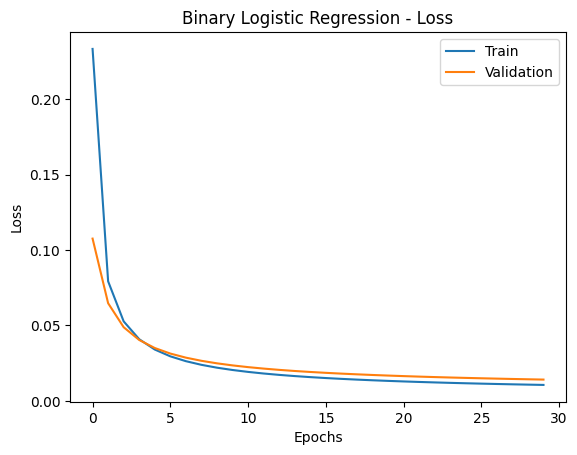

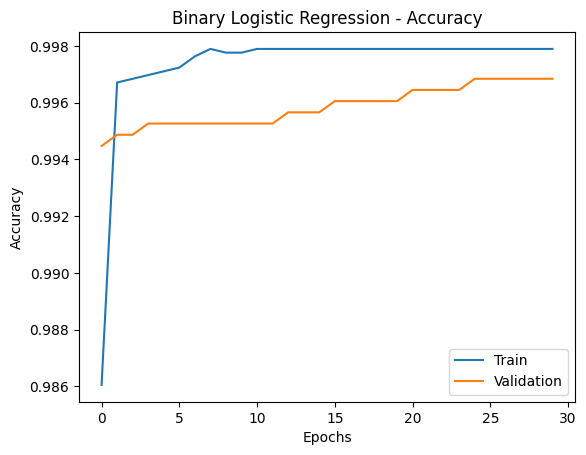

In [9]:
plot_curves(train_losses, val_losses, "Binary Logistic Regression - Loss", "Loss")
plot_curves(train_accs, val_accs, "Binary Logistic Regression - Accuracy", "Accuracy")

# Test

Test Accuracy: 0.9980


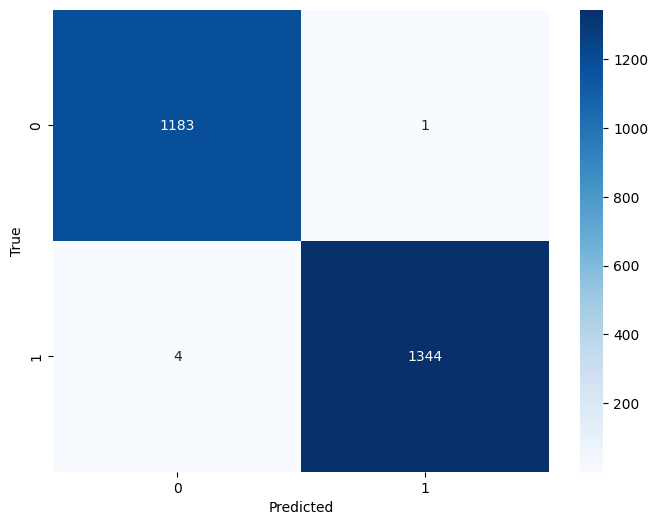

In [10]:
acc, cm = test_model(model_log, test_loader_bin, device, binary=True)
print(f"Test Accuracy: {acc:.4f}")
print_confusion_matrix(cm, classes=["0", "1"])

# 2. Softmax Regression

# Imports

In [11]:
from models.softmax_regression import SoftmaxRegressionModel
from train import train_model, test_model

# Model

In [12]:
model_softmax = SoftmaxRegressionModel(input_dim=784, num_classes=10)
loss_fn = nn.CrossEntropyLoss()

In [13]:
train_loader, val_loader, test_loader = preprocess_mnist(flatten=True)

# Train

In [14]:
train_losses, val_losses, train_accs, val_accs = train_model(
    model_softmax, train_loader, val_loader,
    epochs=30, lr=0.01, device=device, loss_fn=loss_fn
)

Epoch [1/30] Train Loss: 1.1805, Val Loss: 0.7719, Train Acc: 0.7654, Val Acc: 0.8386


Epoch [2/30] Train Loss: 0.6575, Val Loss: 0.5965, Train Acc: 0.8552, Val Acc: 0.8606


Epoch [3/30] Train Loss: 0.5456, Val Loss: 0.5258, Train Acc: 0.8674, Val Acc: 0.8707


Epoch [4/30] Train Loss: 0.4919, Val Loss: 0.4860, Train Acc: 0.8761, Val Acc: 0.8781


Epoch [5/30] Train Loss: 0.4589, Val Loss: 0.4598, Train Acc: 0.8816, Val Acc: 0.8816


Epoch [6/30] Train Loss: 0.4361, Val Loss: 0.4414, Train Acc: 0.8851, Val Acc: 0.8847


Epoch [7/30] Train Loss: 0.4191, Val Loss: 0.4272, Train Acc: 0.8882, Val Acc: 0.8875


Epoch [8/30] Train Loss: 0.4058, Val Loss: 0.4156, Train Acc: 0.8906, Val Acc: 0.8894


Epoch [9/30] Train Loss: 0.3951, Val Loss: 0.4060, Train Acc: 0.8926, Val Acc: 0.8914


Epoch [10/30] Train Loss: 0.3862, Val Loss: 0.3986, Train Acc: 0.8951, Val Acc: 0.8933


Epoch [11/30] Train Loss: 0.3784, Val Loss: 0.3921, Train Acc: 0.8966, Val Acc: 0.8936


Epoch [12/30] Train Loss: 0.3719, Val Loss: 0.3858, Train Acc: 0.8981, Val Acc: 0.8968


Epoch [13/30] Train Loss: 0.3662, Val Loss: 0.3809, Train Acc: 0.8988, Val Acc: 0.8971


Epoch [14/30] Train Loss: 0.3609, Val Loss: 0.3768, Train Acc: 0.9004, Val Acc: 0.8987


Epoch [15/30] Train Loss: 0.3564, Val Loss: 0.3723, Train Acc: 0.9008, Val Acc: 0.9009


Epoch [16/30] Train Loss: 0.3522, Val Loss: 0.3685, Train Acc: 0.9017, Val Acc: 0.9012


Epoch [17/30] Train Loss: 0.3484, Val Loss: 0.3658, Train Acc: 0.9029, Val Acc: 0.9005


Epoch [18/30] Train Loss: 0.3450, Val Loss: 0.3624, Train Acc: 0.9035, Val Acc: 0.9028


Epoch [19/30] Train Loss: 0.3417, Val Loss: 0.3595, Train Acc: 0.9043, Val Acc: 0.9031


Epoch [20/30] Train Loss: 0.3389, Val Loss: 0.3570, Train Acc: 0.9052, Val Acc: 0.9038


Epoch [21/30] Train Loss: 0.3361, Val Loss: 0.3546, Train Acc: 0.9059, Val Acc: 0.9043


Epoch [22/30] Train Loss: 0.3336, Val Loss: 0.3526, Train Acc: 0.9067, Val Acc: 0.9050


Epoch [23/30] Train Loss: 0.3312, Val Loss: 0.3505, Train Acc: 0.9074, Val Acc: 0.9054


Epoch [24/30] Train Loss: 0.3290, Val Loss: 0.3485, Train Acc: 0.9082, Val Acc: 0.9058


Epoch [25/30] Train Loss: 0.3270, Val Loss: 0.3468, Train Acc: 0.9087, Val Acc: 0.9067


Epoch [26/30] Train Loss: 0.3250, Val Loss: 0.3453, Train Acc: 0.9093, Val Acc: 0.9068


Epoch [27/30] Train Loss: 0.3232, Val Loss: 0.3434, Train Acc: 0.9092, Val Acc: 0.9081


Epoch [28/30] Train Loss: 0.3213, Val Loss: 0.3420, Train Acc: 0.9100, Val Acc: 0.9079


Epoch [29/30] Train Loss: 0.3197, Val Loss: 0.3407, Train Acc: 0.9105, Val Acc: 0.9091


Epoch [30/30] Train Loss: 0.3181, Val Loss: 0.3394, Train Acc: 0.9111, Val Acc: 0.9086


# Plots

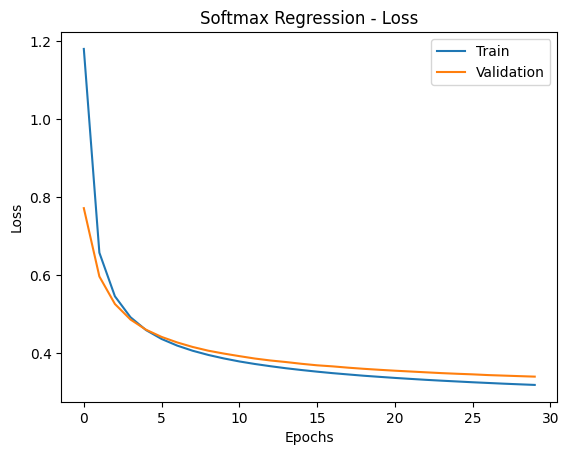

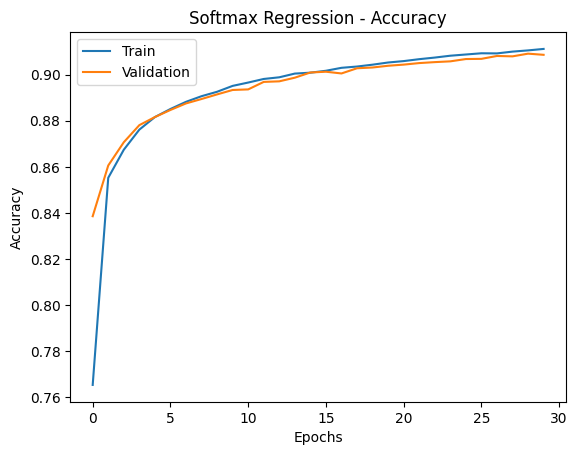

In [15]:
plot_curves(train_losses, val_losses, "Softmax Regression - Loss", "Loss")
plot_curves(train_accs, val_accs, "Softmax Regression - Accuracy", "Accuracy")

# Test

Test Accuracy: 0.9066


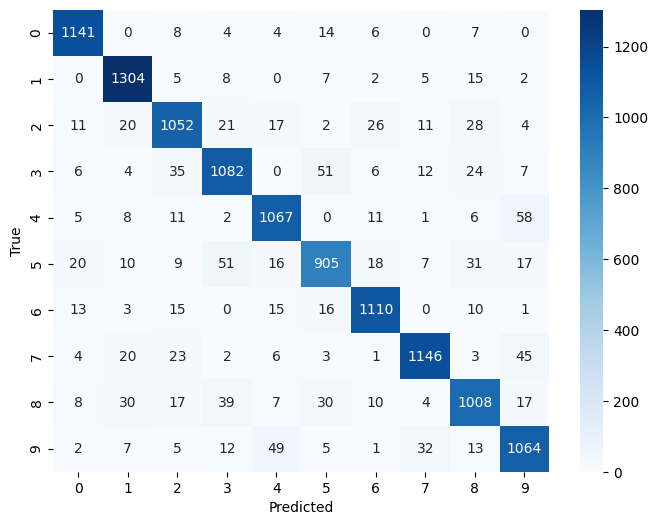

In [16]:
acc, cm = test_model(model_softmax, test_loader, device)
print(f"Test Accuracy: {acc:.4f}")
print_confusion_matrix(cm, classes=[str(i) for i in range(10)])